In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker

/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


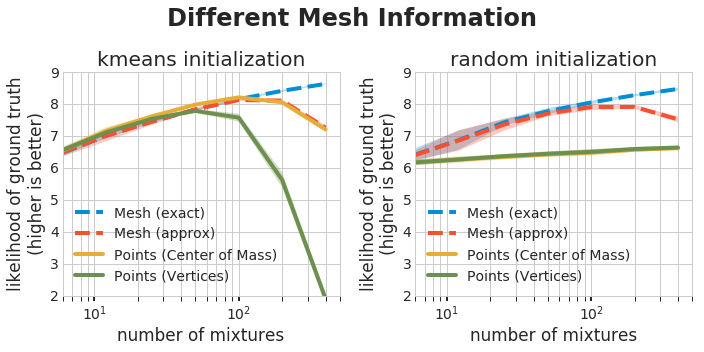

In [42]:
df = pd.read_csv("bunny_1k_com_verts_monday_25.log",names=['k','init','model','l','i'])
mdf = df.groupby(['init','model','k']).mean()
sdf = df.groupby(['init','model','k']).std()
from matplotlib import rc
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')
#plt.rcParams["font.family"] = "sans-serif"
rc('font',**{'family':'sans-serif','sans-serif':['cm']})

pltstuff = 1
if pltstuff == 2:
    subplot_order = [1,3,2,4]
else:
    subplot_order = [1,2]
fig = plt.figure(figsize=(10,5*pltstuff))
for ii, init in enumerate(['kmeans','random']):
    for model in [3,0,1,2]:
        ls = '--' if model == 0 or model ==3 else '-'
        if model == 0:
            label = 'Mesh (approx)'
        if model == 1:
            label = 'Points (Center of Mass)'
        if model == 2:
            label = 'Points (Vertices)'
        if model == 3:
            label = 'Mesh (exact)'
        ldf = mdf.loc[(init,model),]
        x = np.array(ldf.index)
        
        y = ldf.values[:,0]
        error = 2*sdf.loc[(init,model),].values[:,0]

        ax = plt.subplot(pltstuff,2,subplot_order[pltstuff*ii])
        plt.plot(x,y,ls=ls,label=label)
        plt.fill_between(x, y-error, y+error,alpha=0.3)
        plt.grid(True)
        plt.xlabel('number of mixtures')
        plt.title('{} init. fidelity'.format(init))
        plt.title('{} initialization'.format(init))

        plt.ylabel('likelihood of ground truth\n(higher is better)')
        plt.ylim(2,9)
        ax.set_xscale("log", nonposx='clip')
        ax.tick_params(axis='x', which='minor', bottom=True,width=1,length=5)   
        plt.grid(True,axis='x',which='minor')
        ax.tick_params(axis='x', which='major', bottom=True,width=2,length=5)   

        y = ldf.values[:,1]
        error = sdf.loc[(init,model),].values[:,1]

        if pltstuff == 2:
            ax = plt.subplot(pltstuff,2,subplot_order[pltstuff*ii+1])
            plt.plot(x,y,ls=ls,label=label)
            plt.fill_between(x, y-error, y+error,alpha=0.15)

            ax.set_xscale("log", nonposx='clip')
            plt.grid(True)
            plt.xlabel('number of mixtures')
            plt.title('{} init. runtime'.format(init))
            plt.ylabel('iterations until convergence')
            ax.tick_params(axis='x', which='minor', bottom=True,width=1,length=5)   
            plt.grid(True,axis='x',which='minor')
            ax.tick_params(axis='x', which='major', bottom=True,width=2,length=5)   

        #plt.subplot(2,2,3)
        #plt.subplot(2,2,4)
for i in range(pltstuff*2):
    plt.subplot(pltstuff,2,1+i)
    plt.xlim(6,500)
    plt.legend()

fig.tight_layout()
fig.subplots_adjust(top=0.7+pltstuff*0.1)

plt.suptitle('Different Mesh Information',size=24,weight='bold')
plt.savefig('graph_triverts.pdf', facecolor=fig.get_facecolor(), edgecolor='none')

In [39]:
#mdf.loc[('kmeans',0),].values, np.array(mdf.loc[('kmeans',0),].index)

In [4]:
mdf

l       i
init   model k                    
kmeans 0     6    6.457977  25.000
             12   7.014532  25.000
             25   7.477748  25.000
             50   7.822275  24.750
             100  8.121495  23.875
             200  8.098181  22.875
             400  7.251390  17.375
       1     6    6.551823  25.000
             12   7.140916  25.000
             25   7.617638  25.000
             50   7.983571  25.000
             100  8.217907  25.000
             200  8.046881  25.000
             400  7.242091  25.000
       2     6    6.525736  25.000
             12   7.139976  25.000
             25   7.522502  25.000
             50   7.785710  25.000
             100  7.570374  25.000
             200  5.796015  25.000
             400  1.898935  10.375
       3     6    6.491746  25.000
             12   7.008640  25.000
             25   7.449678  25.000
             50   7.813753  24.875
             100  8.146477  24.875
             200  8.410962  25.000
             400  8.624588  24.750
random 0     6    6.377144  25.000
             12   6.928323  25.000
             25   7.374668  25.000
             50   7.695320  25.000
             100  7.912172  25.000
             200  7.908509  24.125
             400  7.513237  24.500
       1     6    6.147032  25.000
             12   6.262965  25.000
             25   6.353038  25.000
             50   6.418712  25.000
             100  6.465496  25.000
             200  6.586637  25.000
             400  6.594746  25.000
       2     6    6.135980  25.000
             12   6.268836  25.000
             25   6.355051  25.000
             50   6.412342  25.000
             100  6.516093  25.000
             200  6.560785  25.000
             400  6.652596  25.000
       3     6    6.431098  25.000
             12   6.885635  25.000
             25   7.412179  25.000
             50   7.757967  25.000
             100  8.035405  25.000
             200  8.272538  25.000
             400  8.475812  25.000